In [7]:
import keras
import numpy as np
from PIL import Image
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
#Load the Inception_V3 model
#inception_model = inception_v3.InceptionV3(weights='imagenet')
 
#Load the ResNet50 model
#resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
#mobilenet_model = mobilenet.MobileNet(weights='imagenet')

In [8]:
model = vgg16.VGG16(include_top = True, weights = 'imagenet')

#remove the classification layer (fc8) softmax?
model.layers.pop()

#remove the next fully connected layer (fc7)
model.layers.pop()

#fix the output of the model
model.outputs = [model.layers[-1].output]

#Stripped down model with 4096 categories

PIL image size (224, 224)


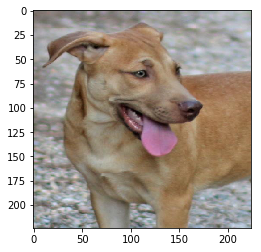

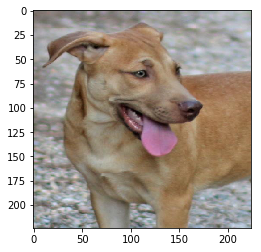

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


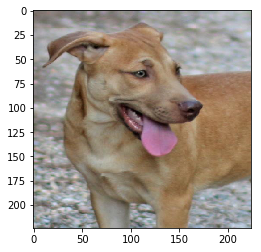

In [9]:
filename = 'data/59442765_500x625.jpg'

#im = Image.open(filename)
#im.rotate(-90).show()
#rotate_image(filename)

# Load image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size', original.size)
plt.imshow(original)
plt.show()
 
# Convert PIL image to NumPy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [6]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
#processed_image = inception_v3.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
 
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label = decode_predictions(predictions)
print(label)

[[('n02115641', 'dingo', 0.32399222), ('n02091244', 'Ibizan_hound', 0.15910307), ('n02099849', 'Chesapeake_Bay_retriever', 0.099244684), ('n02087394', 'Rhodesian_ridgeback', 0.09656441), ('n02105412', 'kelpie', 0.08905335)]]


In [10]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())
#processed_image = inception_v3.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = model.predict(processed_image)
# print predictions
 
print(predictions)
    
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
#label = decode_predictions(predictions)
#print(label)

[[25.738361   2.6617675  0.        ...  0.         0.         0.       ]]


In [12]:
predictions.size

4096

AttributeError: 'Image' object has no attribute 'flatten'

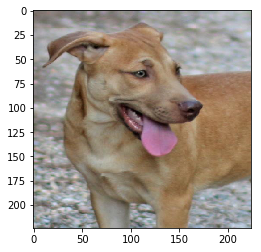

In [13]:
original_test = load_img(filename, target_size=(224, 224))
plt.imshow(original_test)
original_test.flatten()

In [1]:
'''
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=2, activation='linear', name='bottleneck'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=784, activation='hard_sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
'''

"\nmodel = Sequential()\nmodel.add(Dense(units=128, activation='relu', input_dim=))\nmodel.add(Dense(units=64, activation='relu'))\nmodel.add(Dense(units=2, activation='linear', name='bottleneck'))\nmodel.add(Dense(units=64, activation='relu'))\nmodel.add(Dense(units=128, activation='relu'))\nmodel.add(Dense(units=784, activation='hard_sigmoid'))\nmodel.compile(loss='categorical_crossentropy', optimizer='adam')\n"